# Word2Vec

In this notebook we will demonstrate the power of vectorization using Word2Vec

In [33]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset
* Julius Caesar
* Macbeth

In [60]:
data_dir = 'data/'

In [61]:
macbeth_file = data_dir + 'macbeth.txt'

In [160]:
caesar_file = data_dir + 'julius_caesar.txt'

### Remove the stopwords

In [175]:
stopword_file = data_dir + 'long_stopwords.txt'

In [202]:
stop_words = []
stopwords_ak = []

with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
#     print(lines)
    for x in lines:
#         print("x=",x)
        re.sub('\n','',x)
        re.sub('[^A-Za-z0-9]+', '',x)
#         print(x)
        stopwords_ak.append(x)
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp)
stop_words = list(stop_words_temp)
print(stop_words)


['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'cont

In [181]:
# stop_words

In [182]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
#     print("i was called")
    if word not in stop_words:
        return word
    else:
        return ''

In [183]:
clean("king's")

'kings'

In [184]:
clean("they'll")

'theyll'

In [185]:
print(stop_words)

['a\n', 'able\n', 'about\n', 'above\n', 'abst\n', 'accordance\n', 'according\n', 'accordingly\n', 'across\n', 'act\n', 'actually\n', 'added\n', 'adj\n', 'affected\n', 'affecting\n', 'affects\n', 'after\n', 'afterwards\n', 'again\n', 'against\n', 'ah\n', 'all\n', 'almost\n', 'alone\n', 'along\n', 'already\n', 'also\n', 'although\n', 'always\n', 'am\n', 'among\n', 'amongst\n', 'an\n', 'and\n', 'announce\n', 'another\n', 'any\n', 'anybody\n', 'anyhow\n', 'anymore\n', 'anyone\n', 'anything\n', 'anyway\n', 'anyways\n', 'anywhere\n', 'apparently\n', 'approximately\n', 'are\n', 'aren\n', 'arent\n', 'arise\n', 'around\n', 'as\n', 'aside\n', 'ask\n', 'asking\n', 'at\n', 'auth\n', 'available\n', 'away\n', 'awfully\n', 'b\n', 'back\n', 'be\n', 'became\n', 'because\n', 'become\n', 'becomes\n', 'becoming\n', 'been\n', 'before\n', 'beforehand\n', 'begin\n', 'beginning\n', 'beginnings\n', 'begins\n', 'behind\n', 'being\n', 'believe\n', 'below\n', 'beside\n', 'besides\n', 'between\n', 'beyond\n', 'bio

In [186]:
line_count = 0
sentences = []

with open(macbeth_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = [ clean(i) for i in words ]
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)
            
with open(caesar_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = [ clean(i) for i in words ]
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)

In [187]:
sentences

[['1606'],
 [],
 ['the', 'tragedy', 'of', 'macbeth'],
 [],
 [],
 ['by', 'william', 'shakespeare'],
 [],
 [],
 [],
 ['dramatis', 'personae'],
 [],
 ['duncan', 'king', 'of', 'scotland'],
 ['macbeth',
  'thane',
  'of',
  'glamis',
  'and',
  'cawdor',
  'a',
  'general',
  'in',
  'the',
  'kings'],
 ['army'],
 ['lady', 'macbeth', 'his', 'wife'],
 ['macduff', 'thane', 'of', 'fife', 'a', 'nobleman', 'of', 'scotland'],
 ['lady', 'macduff', 'his', 'wife'],
 ['malcolm', 'elder', 'son', 'of', 'duncan'],
 ['donalbain', 'younger', 'son', 'of', 'duncan'],
 ['banquo',
  'thane',
  'of',
  'lochaber',
  'a',
  'general',
  'in',
  'the',
  'kings',
  'army'],
 ['fleance', 'his', 'son'],
 ['lennox', 'nobleman', 'of', 'scotland'],
 ['ross', 'nobleman', 'of', 'scotland'],
 ['menteith', 'nobleman', 'of', 'scotland'],
 ['angus', 'nobleman', 'of', 'scotland'],
 ['caithness', 'nobleman', 'of', 'scotland'],
 ['siward',
  'earl',
  'of',
  'northumberland',
  'general',
  'of',
  'the',
  'english',
  'for

## Word2Vec model

In [188]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

In [189]:
model.wv.vocab

{'1': <gensim.models.keyedvectors.Vocab at 0x7f628c9a7400>,
 '19901993': <gensim.models.keyedvectors.Vocab at 0x7f628c977be0>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f628c487c18>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f628c98e4e0>,
 'about': <gensim.models.keyedvectors.Vocab at 0x7f628c99aba8>,
 'above': <gensim.models.keyedvectors.Vocab at 0x7f628c9aa9b0>,
 'according': <gensim.models.keyedvectors.Vocab at 0x7f628c9a7a90>,
 'act': <gensim.models.keyedvectors.Vocab at 0x7f628c98dcc0>,
 'afraid': <gensim.models.keyedvectors.Vocab at 0x7f628c9a7588>,
 'after': <gensim.models.keyedvectors.Vocab at 0x7f628c98d7b8>,
 'again': <gensim.models.keyedvectors.Vocab at 0x7f628c97a160>,
 'against': <gensim.models.keyedvectors.Vocab at 0x7f628cbe27f0>,
 'age': <gensim.models.keyedvectors.Vocab at 0x7f628c9a7828>,
 'air': <gensim.models.keyedvectors.Vocab at 0x7f626ff8a898>,
 'alarum': <gensim.models.keyedvectors.Vocab at 0x7f628c47ceb8>,
 'alarums': <gensim.models.keyedvectors.Vocab a

In [190]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)
    


### TSNE plot to find the similarity of words

In [191]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [192]:
new_values = tsne_model.fit_transform(tokens)

In [193]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

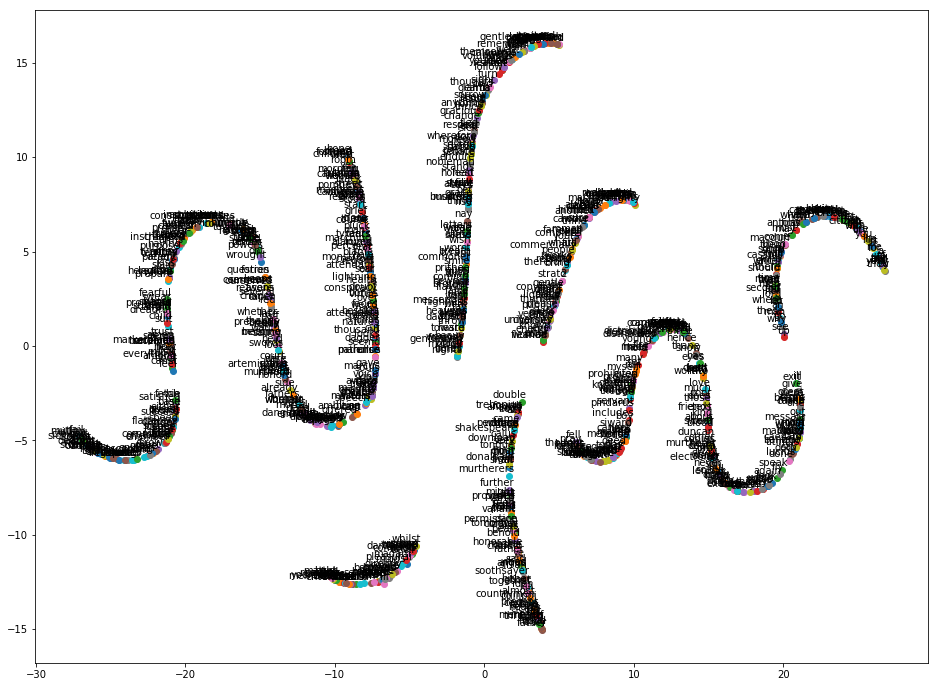

In [194]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

### Analogies

In [195]:
model.most_similar(positive=['caesar','duncan'],negative=['scotland'])

[('of', 0.999887228012085),
 ('the', 0.9998834133148193),
 ('what', 0.9998819828033447),
 ('and', 0.9998816251754761),
 ('cassius', 0.9998809695243835),
 ('a', 0.9998806715011597),
 ('by', 0.9998805522918701),
 ('o', 0.9998798370361328),
 ('our', 0.9998798370361328),
 ('hath', 0.9998797178268433)]

In [196]:
model.most_similar(positive=['caesar','duncan'],negative=['macbeth'])

[('the', 0.9999028444290161),
 ('by', 0.9999021887779236),
 ('a', 0.9999014139175415),
 ('of', 0.9999008178710938),
 ('our', 0.9999004006385803),
 ('but', 0.9999003410339355),
 ('what', 0.9998997449874878),
 ('brutus', 0.99989914894104),
 ('shall', 0.9998987317085266),
 ('in', 0.9998978972434998)]

In [197]:
model.most_similar(positive=['caesar','macbeth'],negative=['banquo'])

[('macduff', 0.9999381303787231),
 ('your', 0.9999284744262695),
 ('they', 0.9999275207519531),
 ('them', 0.9999260902404785),
 ('our', 0.9999256134033203),
 ('a', 0.9999245405197144),
 ('it', 0.9999242424964905),
 ('his', 0.9999240636825562),
 ('hath', 0.9999239444732666),
 ('me', 0.9999238848686218)]

In [198]:
model.most_similar(positive=['rome','scotland'],negative=['banquo'])

[('thou', 0.9998904466629028),
 ('his', 0.9998900294303894),
 ('he', 0.9998885989189148),
 ('your', 0.99988853931427),
 ('here', 0.9998883605003357),
 ('a', 0.9998883605003357),
 ('some', 0.9998879432678223),
 ('come', 0.9998874068260193),
 ('or', 0.9998873472213745),
 ('are', 0.9998871088027954)]

In [156]:
model.doesnt_match("duncan macbeth scotland banquo".split())

'scotland'